<a href="https://colab.research.google.com/github/ekolonsky/RIA_news/blob/main/RIA_Novosti_Verbs_of_Speech_over_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Verbs of speech frequency over time

In [4]:
import requests, re
from collections import Counter

In [1]:
# normal: word -> normal form of word
import cloudpickle as cp
from urllib.request import urlopen

url = 'https://github.com/ekolonsky/RIA_news/raw/main/'

normal = cp.load(urlopen(url + "normal.pkl")) 

print(len(normal), normal['москве'])

415973 москва


In [5]:
  # Функция для разбиений на токены

separators = ';', ',', '"', ':', '.','!', '?', ' ', '`', '%','$','*','(',')','—'
regex_punctuation = '|'.join(map(re.escape, separators))
url = 'https://github.com/ekolonsky/RIA_news/raw/main/'


def get_stopwords():
    req = requests.get(url + 'stopwords.txt')
    ans = req.text.split()
    return ans
stopwords = get_stopwords() # затем сделаем загрузку из словаря стоп-слов

def get_speechverbs():
    req = requests.get(url + 'speech_verbs.txt')
    ans = req.text.split()
    return ans
speechverbs = get_speechverbs() 

def normalize(word):
    word = word.lower()
    if word not in normal:
      normal[word] = morph.parse(word)[0].normal_form
    return normal[word]

def tokenize(text):
    text = text.lower()
    tokens = [normalize(word) for word in re.split(regex_punctuation,text)  
      if not word.isnumeric()
      and word != ''] 
    return [w for w in tokens if w not in stopwords] 


# пример
tokenize('В Москве назвали победителей Гран-при 15 Московского кинофестиваля "Минотавр".')

['москва',
 'назвать',
 'победитель',
 'гран-при',
 'московский',
 'кинофестиваль',
 'минотавр']

In [7]:
# функция для извлечения даты новости из строки со ссылкой на новость
def get_date(link):
  pattern = r'\/20[0-2][0-9][0-1][0-9][0-3][0-9]\/'
  result = re.search(pattern, link)

  if result:
    return result[0][1:-1]
  else:
    return ''
  return 

# пример
get_date('https://ria.ru/20041229/774359.html	Жерар Депардье открыл в Париже второй ресторан')

'20041229'

## Read and count news frequency with speechverbs

In [19]:
%%time
#url = 'https://raw.githubusercontent.com/ekolonsky/RIA_news/main/'
url = 'https://github.com/ekolonsky/RIA_news/raw/main/'
filenames = ['ria-{:02d}-1.txt'.format(i) for i in range(2,23)] 
filenames += ['ria-{:02d}-2.txt'.format(i) for i in range(2,22)]
#filenames = ['ria-{:02d}-1.txt'.format(i) for i in range(13,15)]  # quick test

total, selected = Counter(), Counter()



for filename in filenames:
  print(filename)
  req = requests.get(url + filename)
  for line in req.text.splitlines():
    sep = line.find('\t')
    if sep == -1:
      continue
    link, news = line[:sep],line[sep+1:]
    tokens = tokenize(news)
  
    date = get_date(link)
    year = date[:4]

    total[year] += 1

    if any(word in speechverbs for word in tokens):
      selected[year] += 1



ria-02-1.txt
ria-03-1.txt
ria-04-1.txt
ria-05-1.txt
ria-06-1.txt
ria-07-1.txt
ria-08-1.txt
ria-09-1.txt
ria-10-1.txt
ria-11-1.txt
ria-12-1.txt
ria-13-1.txt
ria-14-1.txt
ria-15-1.txt
ria-16-1.txt
ria-17-1.txt
ria-18-1.txt
ria-19-1.txt
ria-20-1.txt
ria-21-1.txt
ria-22-1.txt
ria-02-2.txt
ria-03-2.txt
ria-04-2.txt
ria-05-2.txt
ria-06-2.txt
ria-07-2.txt
ria-08-2.txt
ria-09-2.txt
ria-10-2.txt
ria-11-2.txt
ria-12-2.txt
ria-13-2.txt
ria-14-2.txt
ria-15-2.txt
ria-16-2.txt
ria-17-2.txt
ria-18-2.txt
ria-19-2.txt
ria-20-2.txt
ria-21-2.txt
CPU times: user 2min 12s, sys: 976 ms, total: 2min 13s
Wall time: 3min 37s


2002 131914 11816 0.08957351001410009
2003 94182 6872 0.07296511010596504
2004 136974 10728 0.07832143326470717
2005 89136 6410 0.07191258301920661
2006 68754 6563 0.0954562643628007
2007 84873 7446 0.08773108055565375
2008 109435 8210 0.07502170238040846
2009 129409 9828 0.07594525883052956
2010 156937 12689 0.08085410069008583
2011 187429 16788 0.08956991714195775
2012 175841 16175 0.09198651054077263
2013 187527 17903 0.09546891914231018
2014 156781 17415 0.11107851078893488
2015 224856 22697 0.10094015725619952
2016 202099 31101 0.15388992523466222
2017 168791 41896 0.2482122862000936
2018 166210 49495 0.297785933457674
2019 177376 53840 0.30353599134042936
2020 163126 49092 0.30094528156149236
2021 139511 46604 0.334052511988302
2022 58680 20565 0.3504601226993865


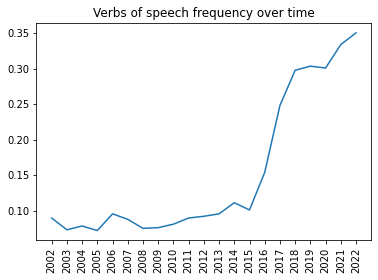

In [24]:
import matplotlib.pylab as plt

freq = {}
for year in total:
  freq[year] = selected[year]/total[year]
  print(year, total[year], selected[year], freq[year])

lists = sorted(freq.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)

ax = plt.gca()
plt.draw()

ax.tick_params(axis='x', labelrotation = 90)
plt.title("Verbs of speech frequency over time")
plt.show()